In [1]:
import cv2
import numpy as np
import os

# Ruta a la carpeta de imágenes en Kaggle
image_folder = '/kaggle/input/soil-humidity-mex'  # Cambia esto según tu ruta en Kaggle

# Listar todas las imágenes en la carpeta
image_files = [os.path.join(image_folder, file) for file in os.listdir(image_folder) if file.endswith('.png')]

# Función para cargar las imágenes en formato RGB con control de lectura
def load_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)  # Leer la imagen en color (BGR por defecto en OpenCV)
    if image is None:
        print(f"Error al leer la imagen: {image_path}")
        return None
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir BGR a RGB
    return image

# Cargar todas las imágenes en una lista, excluyendo aquellas con errores
loaded_images = []
for image_path in image_files:
    img = load_image(image_path)
    if img is not None:
        loaded_images.append(img)

# Verifica que todas las imágenes fueron leídas y procesadas
if len(loaded_images) != len(image_files):
    print(f"Se encontraron errores en la carga de {len(image_files) - len(loaded_images)} imágenes.")

# Imprime el número total de imágenes cargadas correctamente
print(f"Total de imágenes cargadas correctamente: {len(loaded_images)}")

def create_time_series(images, window_size):
    sequences = []
    targets = []
    
    for i in range(len(images) - window_size):
        sequences.append(np.array(images[i:i + window_size]))  # No expandas dimensiones aquí
        targets.append(images[i + window_size])  # Imagen objetivo
    
    return np.array(sequences), np.array(targets)

# Función para verificar propiedades de las imágenes
def check_image_properties(images):
    for idx, img in enumerate(images):
        if img is not None:
            print(f"Imagen {idx + 1}:")
            print(f" - Forma: {img.shape}")  # Dimensiones de la imagen
            print(f" - Tipo de dato: {img.dtype}")  # Tipo de dato
            print(f" - Rango de valores: [{img.min()}, {img.max()}]")  # Rango de valores
            print("-" * 30)

# Llamar a la función para verificar las propiedades de las imágenes cargadas
check_image_properties(loaded_images)


Total de imágenes cargadas correctamente: 554
Imagen 1:
 - Forma: (140, 140, 3)
 - Tipo de dato: uint8
 - Rango de valores: [0, 253]
------------------------------
Imagen 2:
 - Forma: (140, 140, 3)
 - Tipo de dato: uint8
 - Rango de valores: [0, 253]
------------------------------
Imagen 3:
 - Forma: (140, 140, 3)
 - Tipo de dato: uint8
 - Rango de valores: [0, 253]
------------------------------
Imagen 4:
 - Forma: (140, 140, 3)
 - Tipo de dato: uint8
 - Rango de valores: [0, 253]
------------------------------
Imagen 5:
 - Forma: (140, 140, 3)
 - Tipo de dato: uint8
 - Rango de valores: [0, 253]
------------------------------
Imagen 6:
 - Forma: (140, 140, 3)
 - Tipo de dato: uint8
 - Rango de valores: [0, 253]
------------------------------
Imagen 7:
 - Forma: (140, 140, 3)
 - Tipo de dato: uint8
 - Rango de valores: [0, 253]
------------------------------
Imagen 8:
 - Forma: (140, 140, 3)
 - Tipo de dato: uint8
 - Rango de valores: [0, 253]
------------------------------
Imagen 9:


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv_lstm2d (ConvLSTM2D)        │ (None, 140, 140, 64)   │       154,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 140, 140, 3)    │         1,731 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 156,355 (610.76 KB)

 Trainable params: 156,355 (610.76 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


I0000 00:00:1728204829.517211    2055 service.cc:145] XLA service 0x5b446f527620 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728204829.517281    2055 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1728204829.517289    2055 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1728204834.586044    2055 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


55/55 ━━━━━━━━━━━━━━━━━━━━ 40s 605ms/step - loss: 0.1073 - val_loss: 0.0087
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 29s 527ms/step - loss: 0.0082 - val_loss: 0.0075
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 28s 515ms/step - loss: 0.0064 - val_loss: 0.0055
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 28s 516ms/step - loss: 0.0052 - val_loss: 0.0049
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 29s 519ms/step - loss: 0.0047 - val_loss: 0.0044
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 29s 522ms/step - loss: 0.0042 - val_loss: 0.0041
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 29s 522ms/step - loss: 0.0039 - val_loss: 0.0039
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 29s 526ms/step - loss: 0.0037 - val_loss: 0.0037
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 29s 525ms/step - loss: 0.0036 - val_loss: 0.0036
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 29s 523ms/step - loss: 0.0035 - val_loss: 0.0036


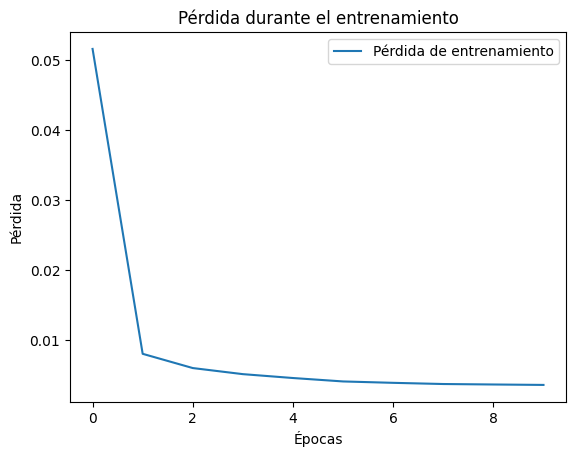

In [2]:
import cv2
import numpy as np
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, Conv2D

# Normaliza las imágenes al rango [0, 1]
loaded_images = [img.astype(np.float32) / 253.0 for img in loaded_images]

# Usando ventanas de 10 imágenes
window_size = 10
X, y = create_time_series(loaded_images, window_size)

# Ajustar las dimensiones de X y y para que coincidan con ConvLSTM
X = X.reshape((X.shape[0], window_size, X.shape[2], X.shape[3], X.shape[4]))  # Forma: (n_samples, window_size, height, width, channels)
y = y.reshape((y.shape[0], y.shape[1], y.shape[2], y.shape[3]))  # Forma: (n_samples, height, width, channels)

# Definir un modelo con ConvLSTM2D para generar imágenes
model = Sequential()
# Capa ConvLSTM2D para capturar información temporal y espacial con padding='same'
model.add(ConvLSTM2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(window_size, 140, 140, 3), padding='same', return_sequences=False))
# Capa final de convolución para generar la imagen de salida con padding='same'
model.add(Conv2D(filters=3, kernel_size=(3, 3), activation='sigmoid', padding='same'))
# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')
# Resumen del modelo
model.summary()

# Entrenamiento del modelo
history = model.fit(X, y, epochs=10, validation_split=0.2, batch_size=8)  # Establece validation_split si deseas validar

# Opción para visualizar la pérdida durante el entrenamiento
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.title('Pérdida durante el entrenamiento')
plt.ylabel('Pérdida')
plt.xlabel('Épocas')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 855ms/step


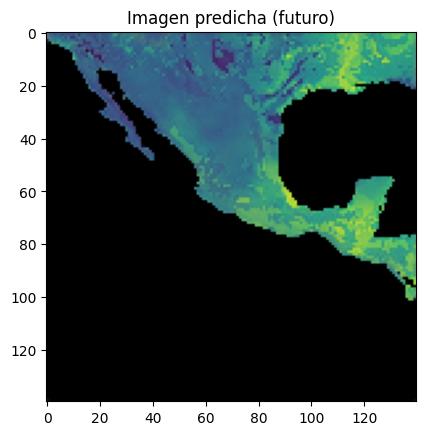

In [3]:
# Predecir una nueva imagen basada en una secuencia de prueba (por ejemplo, la última secuencia en X)
predicted_image = model.predict(X[-1].reshape(1, window_size, 140, 140, 3))

# Escalar la imagen predicha de nuevo al rango 0-255 para visualizarla
predicted_image = (predicted_image[0] * 255).astype(np.uint8)

# Guardar o mostrar la imagen generada
import matplotlib.pyplot as plt
plt.imshow(predicted_image)
plt.title("Imagen predicha (futuro)")
plt.show()

In [4]:
# Exportar el modelo
model.save('conv_lstm_model.h5')